In [3]:
!pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=b6d028d4ef150741bd3a7f8c58da18477deab249293f1279863025d259978865
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [1]:
!pip install matplotlib

Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 797 bytes
Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 2830 bytes
Source IP: 172.28.0.12, Destination IP: 172.28.0.1, Protocol: 6, Size: 66 bytes
Source IP: 172.28.0.12, Destination IP: 172.28.0.1, Protocol: 6, Size: 351 bytes
Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 66 bytes
Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 691 bytes
Source IP: 172.28.0.12, Destination IP: 172.28.0.1, Protocol: 6, Size: 1056 bytes
Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 66 bytes
Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 796 bytes
Source IP: 172.28.0.1, Destination IP: 172.28.0.12, Protocol: 6, Size: 195 bytes
Source IP: 172.28.0.12, Destination IP: 172.28.0.1, Protocol: 6, Size: 66 bytes
Source IP: 172.28.0.12, Destination IP: 172.28.0.1, Protocol: 6, Size: 351 bytes
Source IP: 172.28.0.1, Destina

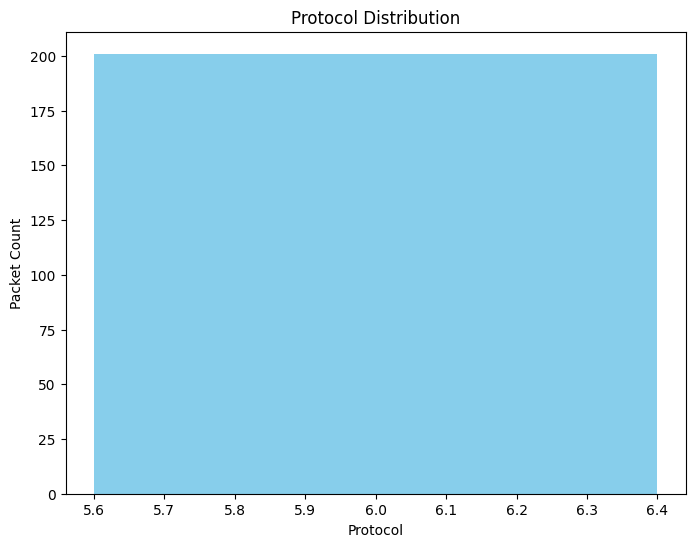

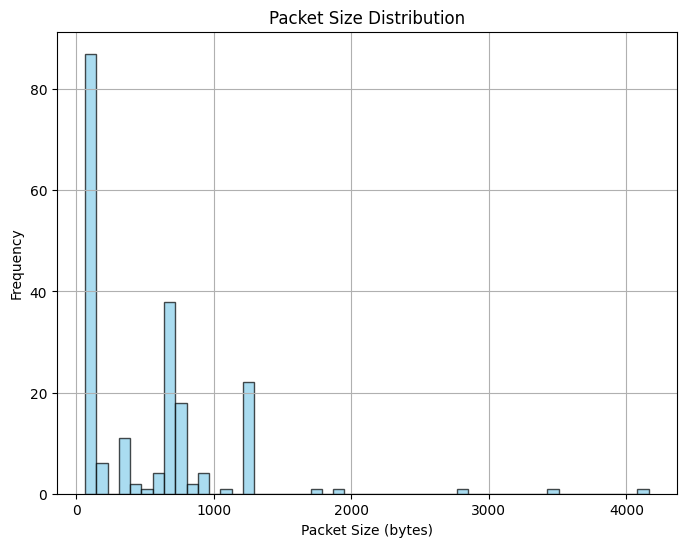

In [4]:
from scapy.all import sniff, IP
import matplotlib.pyplot as plt
import numpy as np

# Global variables for statistics
packet_count = 0
protocol_counts = {}
packet_sizes = []

# Define a function to analyze packets
def analyze_packet(packet):
    global packet_count, protocol_counts, packet_sizes

    if IP in packet:  # Filter IP packets
        packet_count += 1

        src_ip = packet[IP].src
        dst_ip = packet[IP].dst
        proto = packet[IP].proto
        size = len(packet)

        # Increment protocol counts
        protocol_counts[proto] = protocol_counts.get(proto, 0) + 1

        # Record packet size
        packet_sizes.append(size)

        # Print packet details
        print(f"Source IP: {src_ip}, Destination IP: {dst_ip}, Protocol: {proto}, Size: {size} bytes")

# Sniff packets on the network interface
def start_sniffing(interface, filter_proto=None):
    sniff(iface=interface, prn=analyze_packet, filter=filter_proto, store=False)

# Plot protocol distribution
def plot_protocol_distribution():
    global protocol_counts
    protocols = list(protocol_counts.keys())
    counts = list(protocol_counts.values())

    plt.figure(figsize=(8, 6))
    plt.bar(protocols, counts, color='skyblue')
    plt.xlabel('Protocol')
    plt.ylabel('Packet Count')
    plt.title('Protocol Distribution')
    plt.show()

# Plot packet size distribution
def plot_packet_size_distribution():
    plt.figure(figsize=(8, 6))
    plt.hist(packet_sizes, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Packet Size (bytes)')
    plt.ylabel('Frequency')
    plt.title('Packet Size Distribution')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Start sniffing on a specific network interface (change 'eth0' to your interface)
    start_sniffing("eth0")
    print(f"Total packets analyzed: {packet_count}")

    # Plot protocol distribution
    plot_protocol_distribution()

    # Plot packet size distribution
    plot_packet_size_distribution()
